<a href="https://colab.research.google.com/github/meidianarahmawati/mlt2hc7/blob/main/Final%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project Kelompok Healthcare 7 



#Requirements

In [ ]:
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow import nn

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
!pip install tensorflow_decision_forests

In [ ]:
import tensorflow_decision_forests as tfdf

# Dataset


In [ ]:
!wget https://raw.githubusercontent.com/meidianarahmawati/mlt2hc7/main/dataset.csv
!wget https://raw.githubusercontent.com/meidianarahmawati/mlt2hc7/main/symptom_Description.csv
!wget https://raw.githubusercontent.com/meidianarahmawati/mlt2hc7/main/symptom_precaution.csv
!wget https://raw.githubusercontent.com/meidianarahmawati/mlt2hc7/main/Symptom-severity.csv

--2022-07-25 12:33:09--  https://raw.githubusercontent.com/meidianarahmawati/mlt2hc7/main/dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 632202 (617K) [text/plain]
Saving to: ‘dataset.csv’

dataset.csv         100%[===================>] 617.38K  --.-KB/s    in 0.03s   

2022-07-25 12:33:10 (22.0 MB/s) - ‘dataset.csv’ saved [632202/632202]

--2022-07-25 12:33:10--  https://raw.githubusercontent.com/meidianarahmawati/mlt2hc7/main/symptom_Description.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11025 (11K) [text/p

In [ ]:
df = pd.read_csv('dataset.csv')
severity = pd.read_csv('Symptom-severity.csv')
description = pd.read_csv('symptom_Description.csv')
precaution = pd.read_csv('symptom_precaution.csv')

# Exploratory Data Analysis

Pada bagian berikut ini akan dilakukan exploratory data analysis pada dataset.csv untuk melihat profil datanya.


##Dataset

In [ ]:
#5 dataset teratas
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#bentuk data
print("Bentuk data (rows, cols)=>",df.shape)

Bentuk data (rows, cols)=> (4920, 18)


In [ ]:
#tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [ ]:
#missing values (Null)
df.isnull().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

In [ ]:
#missing values (Na)
df.isna().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

In [ ]:
#Menghitung presentase missing values dari masing-masing variabel
(df.isnull().sum()/len(df)*100).to_frame('Persentase Missing Value Dataset (%)')

,Persentase Missing Value Dataset (%)
Disease,0.000000
Symptom_1,0.000000
Symptom_2,0.000000
Symptom_3,0.000000
Symptom_4,7.073171
Symptom_5,24.512195
Symptom_6,40.365854
Symptom_7,53.902439
Symptom_8,60.487805
Symptom_9,65.609756


In [ ]:
#karakteristik dataset (duplikasi data)
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [ ]:
#karakteristik dataset
df.describe().transpose()

,count,unique,top,freq
Disease,4920,41,Fungal infection,120
Symptom_1,4920,34,vomiting,822
Symptom_2,4920,48,vomiting,870
Symptom_3,4920,54,fatigue,726
Symptom_4,4572,50,high_fever,378
Symptom_5,3714,38,headache,348
Symptom_6,2934,32,nausea,390
Symptom_7,2268,26,abdominal_pain,264
Symptom_8,1944,21,abdominal_pain,276
Symptom_9,1692,22,yellowing_of_eyes,228


In [ ]:
#menampilkan semua disease
df['Disease'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1206
Symptom_6    1986
Symptom_7    2652
Symptom_8    2976
Symptom_9    3228
Symptom_10   3408
Symptom_11   3726
Symptom_12   4176
Symptom_13   4416
Symptom_14   4614
Symptom_15   4680
Symptom_16   4728
Symptom_17   4848


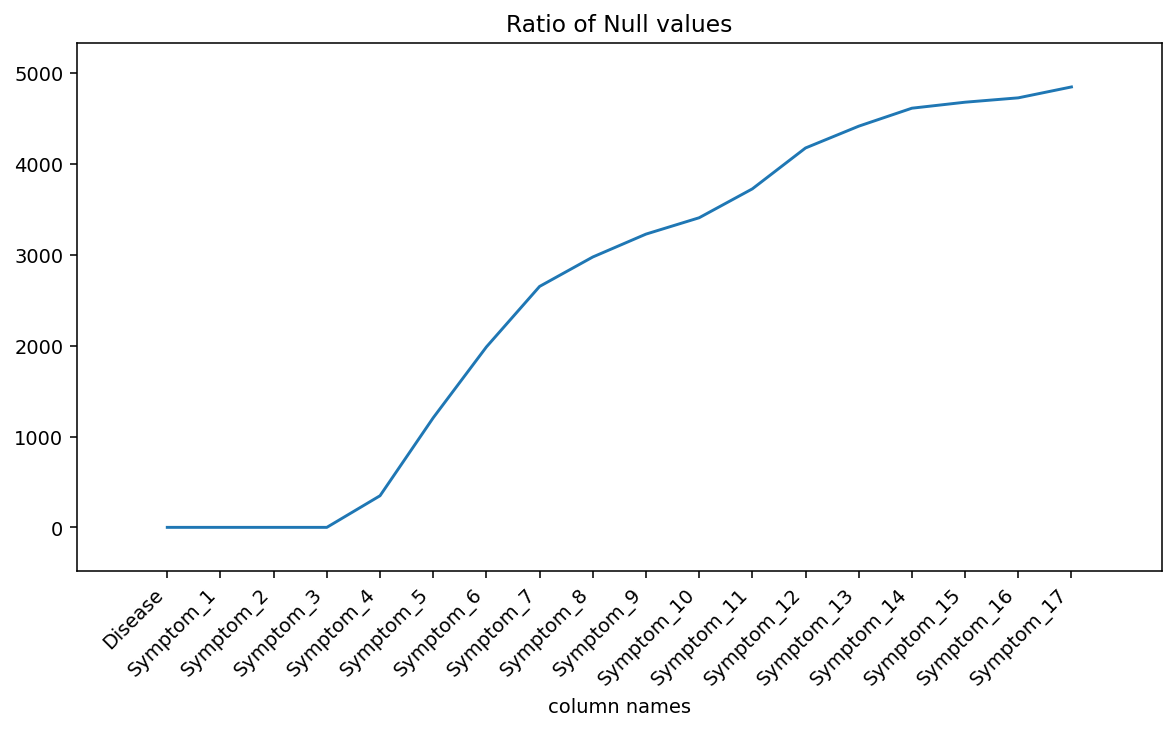

In [ ]:
#statistika data null/na
null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

plt.figure(figsize=(10, 5), dpi=140)
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation = 45, horizontalalignment = 'right')
plt.title('Ratio of Null values')
plt.xlabel('column names')
plt.margins(0.1)
plt.show()

In [ ]:
#eksplore data severity weight
sever = pd.read_csv('Symptom-severity.csv')
sever['Symptom'] = sever['Symptom'].str.replace('_',' ')
sever.head(20)

,Symptom,weight
0,itching,1
1,skin rash,3
2,nodal skin eruptions,4
3,continuous sneezing,4
4,shivering,5
5,chills,3
6,joint pain,3
7,stomach pain,5
8,acidity,3
9,ulcers on tongue,4


In [ ]:
severity.shape

(133, 2)

In [ ]:
#lihat semua list symptom yang ada bobot severity nya
sever['Symptom'].unique()

array(['itching', 'skin rash', 'nodal skin eruptions',
       'continuous sneezing', 'shivering', 'chills', 'joint pain',
       'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting',
       'vomiting', 'burning micturition', 'spotting urination', 'fatigue',
       'weight gain', 'anxiety', 'cold hands and feets', 'mood swings',
       'weight loss', 'restlessness', 'lethargy', 'patches in throat',
       'irregular sugar level', 'cough', 'high fever', 'sunken eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish skin', 'dark urine', 'nausea',
       'loss of appetite', 'pain behind the eyes', 'back pain',
       'constipation', 'abdominal pain', 'diarrhoea', 'mild fever',
       'yellow urine', 'yellowing of eyes', 'acute liver failure',
       'fluid overload', 'swelling of stomach', 'swelled lymph nodes',
       'malaise', 'blurred and distorted vision', 'phlegm',
       'throat irritation', 'redness of eyes', 'sinus pressu

# Preprocessing

Pada bagian berikut ini kolom-kolom symptom yang memanjang ke samping, akan diubah menjadi satu symptom per baris dengan menyimpan index untuk ID penghubungnya. Untuk itu digunakan fungsi pandas melt. Kemudian ditambahkan kolom add1 agar nanti saat dilakukan pivot kolom yang symptomnya ada diberi nilai 1 dan kolom yang symptomnya tidak ada nilainya 0.


In [ ]:
cols = [i for i in df.iloc[:,1:].columns]
tmp = pd.melt(df.reset_index() ,id_vars = ['index'], value_vars = cols )
tmp['add1'] = 1
tmp.head()

,index,variable,value,add1
0,0,Symptom_1,itching,1
1,1,Symptom_1,skin_rash,1
2,2,Symptom_1,itching,1
3,3,Symptom_1,itching,1
4,4,Symptom_1,itching,1


Karena di depan symptom ditemukan ada spasi, digunakan fungsi strip untuk menghilangkan whitespace di depan symptom.

In [ ]:
tmp = tmp.applymap(lambda x: x.strip() if isinstance(x, str) else x)

Selanjutnya dilakukan pivot pada tabel tadi dengan fungsi pandas pivot_table untuk mengubahnya menjadi tabel feature vector yang kolomnya berisi seluruh symptom yang ada dan pada baris datanya jika terdapat symptom kodenya 1 dan jika tidak terdapat symptom kodenya 0. Di sini digunakan juga fungsi astype(int) untuk mengubah dari defaultnya float (1.0 0.0) menjadi integer (1 0).

In [ ]:
diseases = pd.pivot_table(tmp, 
                          values = 'add1',
                          index = 'index',
                          columns = 'value')
diseases = diseases.fillna(0).astype(int)
diseases.insert(0,'Disease',df['Disease'])
diseases.head()

value,Disease,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,...,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin
index,,,,,,,,,,,,,,,,,,,,,
0,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Tabel yang akan digunakan untuk seterusnya adalah tabel feature vector di atas dengan dimensi (baris, kolom) berikut ini 

In [ ]:
diseases.shape

(4920, 132)

Untuk dapat diproses lebih lanjut, akan dilakukan Label Encoding pada kolom Disease. 

In [ ]:
#Label encoding pada disease
disease_list = list(diseases['Disease'].unique())
le = LabelEncoder()
encoded_disease = le.fit_transform(disease_list)

Kemudian teks disease dan encodingnya disimpan dalam sebuah dictionary dengan key berupa angka hasil encoding dan value berupa teks disease

In [ ]:
labeldict = dict(zip(encoded_disease, disease_list))
labeldict

{0: '(vertigo) Paroymsal  Positional Vertigo',
 1: 'AIDS',
 2: 'Acne',
 3: 'Alcoholic hepatitis',
 4: 'Allergy',
 5: 'Arthritis',
 6: 'Bronchial Asthma',
 7: 'Cervical spondylosis',
 8: 'Chicken pox',
 9: 'Chronic cholestasis',
 10: 'Common Cold',
 11: 'Dengue',
 12: 'Diabetes ',
 13: 'Dimorphic hemmorhoids(piles)',
 14: 'Drug Reaction',
 15: 'Fungal infection',
 16: 'GERD',
 17: 'Gastroenteritis',
 18: 'Heart attack',
 19: 'Hepatitis B',
 20: 'Hepatitis C',
 21: 'Hepatitis D',
 22: 'Hepatitis E',
 23: 'Hypertension ',
 24: 'Hyperthyroidism',
 25: 'Hypoglycemia',
 26: 'Hypothyroidism',
 27: 'Impetigo',
 28: 'Jaundice',
 29: 'Malaria',
 30: 'Migraine',
 31: 'Osteoarthristis',
 32: 'Paralysis (brain hemorrhage)',
 33: 'Peptic ulcer diseae',
 34: 'Pneumonia',
 35: 'Psoriasis',
 36: 'Tuberculosis',
 37: 'Typhoid',
 38: 'Urinary tract infection',
 39: 'Varicose veins',
 40: 'hepatitis A'}

Dictionary juga disimpan dalam bentuk sebaliknya, yaitu dengan key berupa teks nama disease dan value berupa angka hasil encoding.

In [ ]:
dictionary={}
for i in range(len(list(le.classes_))):
  dictionary[list(le.classes_)[i]]=i
dictionary

{'(vertigo) Paroymsal  Positional Vertigo': 0,
 'AIDS': 1,
 'Acne': 2,
 'Alcoholic hepatitis': 3,
 'Allergy': 4,
 'Arthritis': 5,
 'Bronchial Asthma': 6,
 'Cervical spondylosis': 7,
 'Chicken pox': 8,
 'Chronic cholestasis': 9,
 'Common Cold': 10,
 'Dengue': 11,
 'Diabetes ': 12,
 'Dimorphic hemmorhoids(piles)': 13,
 'Drug Reaction': 14,
 'Fungal infection': 15,
 'GERD': 16,
 'Gastroenteritis': 17,
 'Heart attack': 18,
 'Hepatitis B': 19,
 'Hepatitis C': 20,
 'Hepatitis D': 21,
 'Hepatitis E': 22,
 'Hypertension ': 23,
 'Hyperthyroidism': 24,
 'Hypoglycemia': 25,
 'Hypothyroidism': 26,
 'Impetigo': 27,
 'Jaundice': 28,
 'Malaria': 29,
 'Migraine': 30,
 'Osteoarthristis': 31,
 'Paralysis (brain hemorrhage)': 32,
 'Peptic ulcer diseae': 33,
 'Pneumonia': 34,
 'Psoriasis': 35,
 'Tuberculosis': 36,
 'Typhoid': 37,
 'Urinary tract infection': 38,
 'Varicose veins': 39,
 'hepatitis A': 40}

Kemudian dilakukan split dataset untuk memisahkan kolom-kolom feature dan kolom label, serta memisahkan train data dan test data dengan test size 20%

In [ ]:
#Split dataset menjadi feature (X) dan label (y)
y = diseases['Disease']
X = diseases.drop(columns=['Disease'])

In [ ]:
#Split train dan test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
y_train_tx = y_train
y_test_tx = y_test

Selanjutnya, label encoding yang tadi dibuat diterapkan pada y_train dan y_test

In [ ]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

#### Tambahan Eksploratory
Selama melakukan tahapan preprocessing di atas, ditemukan ada perbedaan jumlah symptom di dataset (131 symptom) dan di master data (132 symptom di dataset severity).

In [ ]:
print(set(severity['Symptom']))
print(set(X.columns))
diffsymptom = list(set(severity['Symptom']).symmetric_difference(set(X.columns)))
diffsymptom

{'stomach_pain', 'continuous_feel_of_urine', 'constipation', 'cramps', 'sinus_pressure', 'lack_of_concentration', 'bruising', 'swelling_of_stomach', 'yellow_urine', 'belly_pain', 'irritation_in_anus', 'fluid_overload', 'extra_marital_contacts', 'depression', 'excessive_hunger', 'prominent_veins_on_calf', 'patches_in_throat', 'chest_pain', 'small_dents_in_nails', 'unsteadiness', 'painful_walking', 'itching', 'swollen_blood_vessels', 'swelling_joints', 'swelled_lymph_nodes', 'obesity', 'dehydration', 'ulcers_on_tongue', 'muscle_wasting', 'blister', 'blood_in_sputum', 'stiff_neck', 'family_history', 'dark_urine', 'sweating', 'foul_smell_ofurine', 'fatigue', 'loss_of_appetite', 'swollen_legs', 'brittle_nails', 'congestion', 'yellow_crust_ooze', 'sunken_eyes', 'indigestion', 'mucoid_sputum', 'spinning_movements', 'vomiting', 'weakness_of_one_body_side', 'pain_behind_the_eyes', 'drying_and_tingling_lips', 'joint_pain', 'skin_peeling', 'knee_pain', 'irritability', 'breathlessness', 'nausea', 

['foul_smell_of urine',
 'foul_smell_ofurine',
 'spotting_ urination',
 'dischromic_patches',
 'dischromic _patches',
 'spotting_urination',
 'prognosis']

Setelah dilihat dari 2 himpunan tersebut dan dicari perbedaannya, terdapat 7 item berbeda. Dari 7 item tersebut dapat dilihat bahwa 6 diantaranya sebenarnya 3 symptom yang sama hanya berbeda di penulisan spasi dan dash. Item yang benar-benar berbeda adalah item 'prognosis'. Prognosis sendiri bukan merupakan nama symptom. Menurut definisi depkes.org, prognosis adalah perkiraan kemungkinan munculnya penyakit, kondisi, atau perjalanan suatu penyakit. Jadi item prognosis di atas mungkin maksudnya adalah kolom label Disease.

# Model

Pada bagian ini akan dibuat perbandingan performa dua model klasifikasi, yaitu:
1. Neural Network Classifier dari TensorFlow 
2. Random Forest Classifier dari TensorFlow Decision Forest


##**Model Neural Network**

In [ ]:
X_train

value,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin
index,,,,,,,,,,,,,,,,,,,,,
613,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
4155,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
3803,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3321,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3790,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3264,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
1653,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
y_train

array([19, 28, 26, ...,  4,  3, 10])

###Build model architecture & Training data

In [ ]:
model = Sequential([
          Dense(512,input_shape=[131], activation=nn.relu),
          Dense(256, activation=nn.relu),
          Dense(41, activation=nn.softmax)
        ])

In [ ]:
adam = Adam(learning_rate=0.001)

In [ ]:
#Callback
callback = EarlyStopping(
    monitor="accuracy",
    patience=10,
    restore_best_weights=True,
    mode='auto'
)

In [ ]:
model.compile(loss=SparseCategoricalCrossentropy(from_logits=True),optimizer=adam,metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               67584     
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 41)                10537     
                                                                 
Total params: 209,449
Trainable params: 209,449
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, batch_size=64, epochs=50, callbacks=callback)

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
62/62 [==============================] - 3s 8ms/step - loss: 3.2489 - accuracy: 0.7655
Epoch 2/50
62/62 [==============================] - 1s 8ms/step - loss: 2.7855 - accuracy: 0.9728
Epoch 3/50
62/62 [==============================] - 1s 9ms/step - loss: 2.7722 - accuracy: 0.9840
Epoch 4/50
62/62 [==============================] - 1s 8ms/step - loss: 2.7553 - accuracy: 1.0000
Epoch 5/50
62/62 [==============================] - 0s 5ms/step - loss: 2.7550 - accuracy: 1.0000
Epoch 6/50
62/62 [==============================] - 0s 5ms/step - loss: 2.7549 - accuracy: 1.0000
Epoch 7/50
62/62 [==============================] - 0s 5ms/step - loss: 2.7548 -

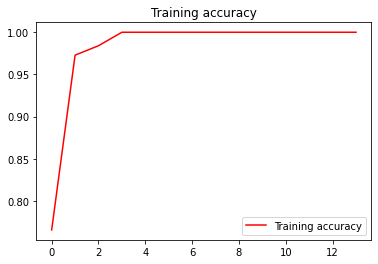

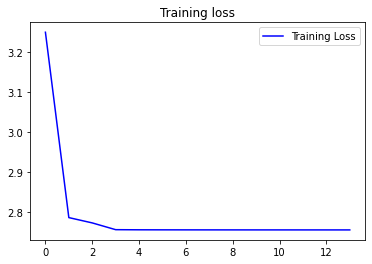

In [ ]:
# Visualize Loss & Accuracy
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.title('Training accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

###Testing & Evaluate model

In [ ]:
X_test.shape

(984, 131)

In [ ]:
predictions=model.predict(X_test, batch_size=None)

In [ ]:
predictions=np.argmax(predictions, axis = 1)

In [ ]:
testing = pd.DataFrame()
testing['Disease'] = y_test
testing['Pred_Disease_NN'] = predictions

In [ ]:
testing.head()

,Disease,Pred_Disease_NN
0,18,18
1,40,40
2,36,36
3,25,25
4,33,33


In [ ]:
print(classification_report(testing['Disease'].values, testing['Pred_Disease_NN'].values, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        23
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        21
          10       1.00      1.00      1.00        34
          11       1.00      1.00      1.00        18
          12       1.00      1.00      1.00        22
          13       1.00      1.00      1.00        27
          14       1.00      1.00      1.00        27
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1.00        27
          17       1.00    

##**Model Random Forest**

Untuk melakukan proses fit pada model Random Forest, diperlukan dataframe yang memliki label. Karena itu, kolom label Disease akan digabungkan kembali dengan dataframe X_train dan X_test

In [ ]:
df_train, df_test = X_train.copy(), X_test.copy()

In [ ]:
df_train.insert(0,'Disease',y_train_tx)
df_test.insert(0,'Disease',y_test_tx)

In [ ]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(df_train, label="Disease")
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(df_test, label="Disease")

In [ ]:
rf_model = tfdf.keras.RandomForestModel()
rf_model.fit(train_ds)

In [ ]:
rf_model.compile(metrics=["accuracy"])
evaluation = rf_model.evaluate(test_ds, return_dict=True)
for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 1s 922ms/step - loss: 0.0000e+00 - accuracy: 0.9990
loss: 0.0000
accuracy: 0.9990


In [ ]:
tfdf.model_plotter.plot_model_in_colab(rf_model, tree_idx=0, max_depth=15)

In [ ]:
rf_model.make_inspector().evaluation()

Evaluation(num_examples=3936, accuracy=0.9982215447154471, loss=0.08705950059693277, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [ ]:
rf_model.make_inspector().variable_importances()

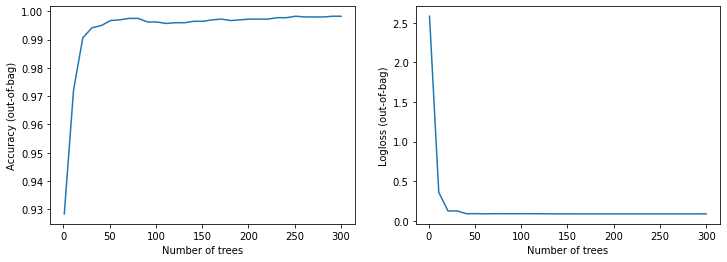

In [ ]:
logs = rf_model.make_inspector().training_logs()
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")
plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")
plt.show()

In [ ]:
rf_predictions = rf_model.predict(test_ds)
y_pred_rf = np.argmax(rf_predictions, axis=1)
df_test.insert(1, 'y_test', y_test)
df_test.insert(1, 'y_pred_rf', y_pred_rf)

diseasepred = list(map(lambda x : labeldict[x], y_pred_rf))
df_test.insert(1, 'Disease_pred_rf', diseasepred)

df_test

1/1 [==============================] - 0s 347ms/step


value,Disease,Disease_pred_rf,y_pred_rf,y_test,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,...,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin
index,,,,,,,,,,,,,,,,,,,,,
1525,Heart attack,Heart attack,18,18,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1013,hepatitis A,hepatitis A,40,40,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1892,Tuberculosis,Tuberculosis,36,36,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
1972,Hypoglycemia,Hypoglycemia,25,25,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
873,Peptic ulcer diseae,Peptic ulcer diseae,33,33,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3871,Dengue,Dengue,11,11,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1366,Paralysis (brain hemorrhage),Paralysis (brain hemorrhage),32,32,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
854,Chronic cholestasis,Chronic cholestasis,9,9,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1


### Confusion Matrix dan Classification Report Random Forest


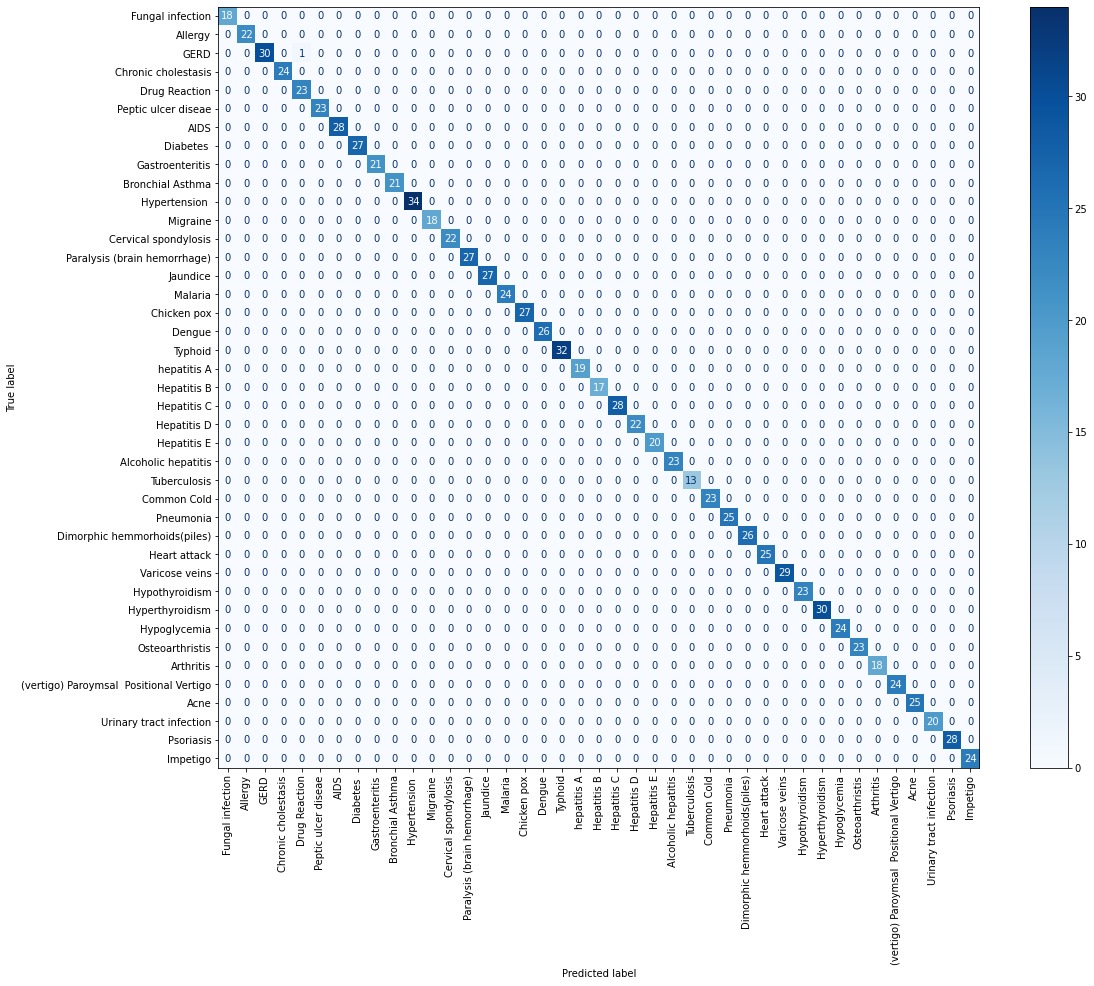

In [ ]:
fig, ax = plt.subplots(figsize=(18,14))
matrix = ConfusionMatrixDisplay.from_predictions(df_test['Disease'].values, df_test['Disease_pred_rf'].values, display_labels=disease_list, cmap='Blues', ax=ax)
plt.xticks(rotation=90)
plt.show()

In [ ]:
print(classification_report(df_test['Disease'].values, df_test['Disease_pred_rf'].values))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        22
                                   Acne       1.00      0.97      0.98        31
                    Alcoholic hepatitis       1.00      1.00      1.00        24
                                Allergy       0.96      1.00      0.98        23
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        28
                   Cervical spondylosis       1.00      1.00      1.00        27
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        21
                            Common Cold       1.00      1.00      1.00        34
                           

#Simulation for Expert System

##Fill in symptoms

In [ ]:
#@title **Disease Diagnosis**
#@markdown Pilih gejala yang dialami:
#boolean_checkbox = False #@param {type:"boolean"}
gejala_1 = "itching" #@param ["Other", "itching", "skin_rash", "nodal_skin_eruptions", "continuous_sneezing", "shivering", "chills", "joint_pain", "stomach_pain", "acidity", "ulcers_on_tongue", "muscle_wasting", "vomiting", "burning_micturition", "spotting_urination", "fatigue", "weight_gain", "anxiety", "cold_hands_and_feets", "mood_swings", "weight_loss", "restlessness", "lethargy", "patches_in_throat", "irregular_sugar_level", "cough", "high_fever", "sunken_eyes", "breathlessness", "sweating", "dehydration", "indigestion", "headache", "yellowish_skin", "dark_urine", "nausea", "loss_of_appetite", "pain_behind_the_eyes", "back_pain", "constipation", "abdominal_pain", "diarrhoea", "mild_fever", "yellow_urine", "yellowing_of_eyes", "acute_liver_failure", "fluid_overload", "swelling_of_stomach", "swelled_lymph_nodes", "malaise", "blurred_and_distorted_vision", "phlegm", "throat_irritation", "redness_of_eyes", "sinus_pressure", "runny_nose", "congestion", "chest_pain", "weakness_in_limbs", "fast_heart_rate", "pain_during_bowel_movements", "pain_in_anal_region", "bloody_stool", "irritation_in_anus", "neck_pain", "dizziness", "cramps", "bruising", "obesity", "swollen_legs", "swollen_blood_vessels", "puffy_face_and_eyes", "enlarged_thyroid", "brittle_nails", "swollen_extremeties", "excessive_hunger", "extra_marital_contacts", "drying_and_tingling_lips", "slurred_speech", "knee_pain", "hip_joint_pain", "muscle_weakness", "stiff_neck", "swelling_joints", "movement_stiffness", "spinning_movements", "loss_of_balance", "unsteadiness", "weakness_of_one_body_side", "loss_of_smell", "bladder_discomfort", "foul_smell_ofurine", "continuous_feel_of_urine", "passage_of_gases", "internal_itching", "toxic_look_(typhos)", "depression", "irritability", "muscle_pain", "altered_sensorium", "red_spots_over_body", "belly_pain", "abnormal_menstruation", "dischromic_patches", "watering_from_eyes", "increased_appetite", "polyuria", "family_history", "mucoid_sputum", "rusty_sputum", "lack_of_concentration", "visual_disturbances", "receiving_blood_transfusion", "receiving_unsterile_injections", "coma", "stomach_bleeding", "distention_of_abdomen", "history_of_alcohol_consumption", "blood_in_sputum", "prominent_veins_on_calf", "palpitations", "painful_walking", "pus_filled_pimples", "blackheads", "scurring", "skin_peeling", "silver_like_dusting", "small_dents_in_nails", "inflammatory_nails", "blister", "red_sore_around_nose", "yellow_crust_ooze", "prognosis"]
gejala_2 = 'skin_rash' #@param ['Other','itching', 'skin_rash', 'nodal_skin_eruptions','continuous_sneezing', 'shivering', 'chills', 'joint_pain','stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting','vomiting', 'burning_micturition', 'spotting_urination','fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets','mood_swings', 'weight_loss', 'restlessness', 'lethargy','patches_in_throat', 'irregular_sugar_level', 'cough','high_fever', 'sunken_eyes', 'breathlessness', 'sweating','dehydration', 'indigestion', 'headache', 'yellowish_skin','dark_urine', 'nausea', 'loss_of_appetite','pain_behind_the_eyes', 'back_pain', 'constipation','abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine','yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload','swelling_of_stomach', 'swelled_lymph_nodes', 'malaise','blurred_and_distorted_vision', 'phlegm', 'throat_irritation','redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion','chest_pain', 'weakness_in_limbs', 'fast_heart_rate','pain_during_bowel_movements', 'pain_in_anal_region','bloody_stool', 'irritation_in_anus', 'neck_pain', 'dizziness','cramps', 'bruising', 'obesity', 'swollen_legs','swollen_blood_vessels', 'puffy_face_and_eyes','enlarged_thyroid', 'brittle_nails', 'swollen_extremeties','excessive_hunger', 'extra_marital_contacts','drying_and_tingling_lips', 'slurred_speech', 'knee_pain','hip_joint_pain', 'muscle_weakness', 'stiff_neck','swelling_joints', 'movement_stiffness', 'spinning_movements','loss_of_balance', 'unsteadiness', 'weakness_of_one_body_side','loss_of_smell', 'bladder_discomfort', 'foul_smell_ofurine','continuous_feel_of_urine', 'passage_of_gases','internal_itching', 'toxic_look_(typhos)', 'depression','irritability', 'muscle_pain', 'altered_sensorium','red_spots_over_body', 'belly_pain', 'abnormal_menstruation','dischromic_patches', 'watering_from_eyes', 'increased_appetite','polyuria', 'family_history', 'mucoid_sputum', 'rusty_sputum','lack_of_concentration', 'visual_disturbances','receiving_blood_transfusion', 'receiving_unsterile_injections','coma', 'stomach_bleeding', 'distention_of_abdomen','history_of_alcohol_consumption', 'blood_in_sputum','prominent_veins_on_calf', 'palpitations', 'painful_walking','pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling','silver_like_dusting', 'small_dents_in_nails','inflammatory_nails', 'blister', 'red_sore_around_nose','yellow_crust_ooze', 'prognosis'] {type:"string"}
gejala_3 = 'nodal_skin_eruptions' #@param ['Other','itching', 'skin_rash', 'nodal_skin_eruptions','continuous_sneezing', 'shivering', 'chills', 'joint_pain','stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting','vomiting', 'burning_micturition', 'spotting_urination','fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets','mood_swings', 'weight_loss', 'restlessness', 'lethargy','patches_in_throat', 'irregular_sugar_level', 'cough','high_fever', 'sunken_eyes', 'breathlessness', 'sweating','dehydration', 'indigestion', 'headache', 'yellowish_skin','dark_urine', 'nausea', 'loss_of_appetite','pain_behind_the_eyes', 'back_pain', 'constipation','abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine','yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload','swelling_of_stomach', 'swelled_lymph_nodes', 'malaise','blurred_and_distorted_vision', 'phlegm', 'throat_irritation','redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion','chest_pain', 'weakness_in_limbs', 'fast_heart_rate','pain_during_bowel_movements', 'pain_in_anal_region','bloody_stool', 'irritation_in_anus', 'neck_pain', 'dizziness','cramps', 'bruising', 'obesity', 'swollen_legs','swollen_blood_vessels', 'puffy_face_and_eyes','enlarged_thyroid', 'brittle_nails', 'swollen_extremeties','excessive_hunger', 'extra_marital_contacts','drying_and_tingling_lips', 'slurred_speech', 'knee_pain','hip_joint_pain', 'muscle_weakness', 'stiff_neck','swelling_joints', 'movement_stiffness', 'spinning_movements','loss_of_balance', 'unsteadiness', 'weakness_of_one_body_side','loss_of_smell', 'bladder_discomfort', 'foul_smell_ofurine','continuous_feel_of_urine', 'passage_of_gases','internal_itching', 'toxic_look_(typhos)', 'depression','irritability', 'muscle_pain', 'altered_sensorium','red_spots_over_body', 'belly_pain', 'abnormal_menstruation','dischromic_patches', 'watering_from_eyes', 'increased_appetite','polyuria', 'family_history', 'mucoid_sputum', 'rusty_sputum','lack_of_concentration', 'visual_disturbances','receiving_blood_transfusion', 'receiving_unsterile_injections','coma', 'stomach_bleeding', 'distention_of_abdomen','history_of_alcohol_consumption', 'blood_in_sputum','prominent_veins_on_calf', 'palpitations', 'painful_walking','pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling','silver_like_dusting', 'small_dents_in_nails','inflammatory_nails', 'blister', 'red_sore_around_nose','yellow_crust_ooze', 'prognosis'] {type:"string"}
gejala_4 = 'continuous_sneezing' #@param ['Other','itching', 'skin_rash', 'nodal_skin_eruptions','continuous_sneezing', 'shivering', 'chills', 'joint_pain','stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting','vomiting', 'burning_micturition', 'spotting_urination','fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets','mood_swings', 'weight_loss', 'restlessness', 'lethargy','patches_in_throat', 'irregular_sugar_level', 'cough','high_fever', 'sunken_eyes', 'breathlessness', 'sweating','dehydration', 'indigestion', 'headache', 'yellowish_skin','dark_urine', 'nausea', 'loss_of_appetite','pain_behind_the_eyes', 'back_pain', 'constipation','abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine','yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload','swelling_of_stomach', 'swelled_lymph_nodes', 'malaise','blurred_and_distorted_vision', 'phlegm', 'throat_irritation','redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion','chest_pain', 'weakness_in_limbs', 'fast_heart_rate','pain_during_bowel_movements', 'pain_in_anal_region','bloody_stool', 'irritation_in_anus', 'neck_pain', 'dizziness','cramps', 'bruising', 'obesity', 'swollen_legs','swollen_blood_vessels', 'puffy_face_and_eyes','enlarged_thyroid', 'brittle_nails', 'swollen_extremeties','excessive_hunger', 'extra_marital_contacts','drying_and_tingling_lips', 'slurred_speech', 'knee_pain','hip_joint_pain', 'muscle_weakness', 'stiff_neck','swelling_joints', 'movement_stiffness', 'spinning_movements','loss_of_balance', 'unsteadiness', 'weakness_of_one_body_side','loss_of_smell', 'bladder_discomfort', 'foul_smell_ofurine','continuous_feel_of_urine', 'passage_of_gases','internal_itching', 'toxic_look_(typhos)', 'depression','irritability', 'muscle_pain', 'altered_sensorium','red_spots_over_body', 'belly_pain', 'abnormal_menstruation','dischromic_patches', 'watering_from_eyes', 'increased_appetite','polyuria', 'family_history', 'mucoid_sputum', 'rusty_sputum','lack_of_concentration', 'visual_disturbances','receiving_blood_transfusion', 'receiving_unsterile_injections','coma', 'stomach_bleeding', 'distention_of_abdomen','history_of_alcohol_consumption', 'blood_in_sputum','prominent_veins_on_calf', 'palpitations', 'painful_walking','pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling','silver_like_dusting', 'small_dents_in_nails','inflammatory_nails', 'blister', 'red_sore_around_nose','yellow_crust_ooze', 'prognosis'] {type:"string"}
gejala_5 = 'chills' #@param ['Other','itching', 'skin_rash', 'nodal_skin_eruptions','continuous_sneezing', 'shivering', 'chills', 'joint_pain','stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting','vomiting', 'burning_micturition', 'spotting_urination','fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets','mood_swings', 'weight_loss', 'restlessness', 'lethargy','patches_in_throat', 'irregular_sugar_level', 'cough','high_fever', 'sunken_eyes', 'breathlessness', 'sweating','dehydration', 'indigestion', 'headache', 'yellowish_skin','dark_urine', 'nausea', 'loss_of_appetite','pain_behind_the_eyes', 'back_pain', 'constipation','abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine','yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload','swelling_of_stomach', 'swelled_lymph_nodes', 'malaise','blurred_and_distorted_vision', 'phlegm', 'throat_irritation','redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion','chest_pain', 'weakness_in_limbs', 'fast_heart_rate','pain_during_bowel_movements', 'pain_in_anal_region','bloody_stool', 'irritation_in_anus', 'neck_pain', 'dizziness','cramps', 'bruising', 'obesity', 'swollen_legs','swollen_blood_vessels', 'puffy_face_and_eyes','enlarged_thyroid', 'brittle_nails', 'swollen_extremeties','excessive_hunger', 'extra_marital_contacts','drying_and_tingling_lips', 'slurred_speech', 'knee_pain','hip_joint_pain', 'muscle_weakness', 'stiff_neck','swelling_joints', 'movement_stiffness', 'spinning_movements','loss_of_balance', 'unsteadiness', 'weakness_of_one_body_side','loss_of_smell', 'bladder_discomfort', 'foul_smell_ofurine','continuous_feel_of_urine', 'passage_of_gases','internal_itching', 'toxic_look_(typhos)', 'depression','irritability', 'muscle_pain', 'altered_sensorium','red_spots_over_body', 'belly_pain', 'abnormal_menstruation','dischromic_patches', 'watering_from_eyes', 'increased_appetite','polyuria', 'family_history', 'mucoid_sputum', 'rusty_sputum','lack_of_concentration', 'visual_disturbances','receiving_blood_transfusion', 'receiving_unsterile_injections','coma', 'stomach_bleeding', 'distention_of_abdomen','history_of_alcohol_consumption', 'blood_in_sputum','prominent_veins_on_calf', 'palpitations', 'painful_walking','pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling','silver_like_dusting', 'small_dents_in_nails','inflammatory_nails', 'blister', 'red_sore_around_nose','yellow_crust_ooze', 'prognosis'] {type:"string"}

##Predict Disease

In [ ]:
symptoms=[gejala_1,gejala_2,gejala_3,gejala_4,gejala_5]
print(symptoms)

['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'chills']


In [ ]:
diseases.columns

Index(['Disease', 'abdominal_pain', 'abnormal_menstruation', 'acidity',
       'acute_liver_failure', 'altered_sensorium', 'anxiety', 'back_pain',
       'belly_pain', 'blackheads',
       ...
       'vomiting', 'watering_from_eyes', 'weakness_in_limbs',
       'weakness_of_one_body_side', 'weight_gain', 'weight_loss',
       'yellow_crust_ooze', 'yellow_urine', 'yellowing_of_eyes',
       'yellowish_skin'],
      dtype='object', name='value', length=132)

In [ ]:
symptom_list = X_test.columns.tolist()
result = np.isin(symptom_list, symptoms)
result=list(result)

In [ ]:
for i in range(len(result)):
  if result[i]==True:
    result[i]=1
  else:
    result[i]=0

In [ ]:
diagnosis = np.argmax(model.predict(np.array(result).reshape(1,131)))
diagnosis = list(le.classes_)[diagnosis]

1/1 [==============================] - 0s 26ms/step


In [ ]:
disease_description = description[description['Disease']==diagnosis]['Description'].values

In [ ]:
disease_description = disease_description[0]

In [ ]:
precautions=[]

In [ ]:
precautions.append(precaution[precaution['Disease']==diagnosis]['Precaution_1'].values)
precautions.append(precaution[precaution['Disease']==diagnosis]['Precaution_2'].values)
precautions.append(precaution[precaution['Disease']==diagnosis]['Precaution_3'].values)
precautions.append(precaution[precaution['Disease']==diagnosis]['Precaution_4'].values)

In [ ]:
print("Here is your diagnosis result!")
print("Disease name: "+diagnosis)
print("Disease description: "+disease_description)
print("Precautions:")
for i in range(4):
  print(str(i+1)+". "+precautions[i][0])

Here is your diagnosis result!
Disease name: Fungal infection
Disease description: In humans, fungal infections occur when an invading fungus takes over an area of the body and is too much for the immune system to handle. Fungi can live in the air, soil, water, and plants. There are also some fungi that live naturally in the human body. Like many microbes, there are helpful fungi and harmful fungi.
Precautions:
1. bath twice
2. use detol or neem in bathing water
3. keep infected area dry
4. use clean cloths


## Saving Notebooks To GitHub or Drive

Any time you open a GitHub hosted notebook in Colab, it opens a new editable view of the notebook. You can run and modify the notebook without worrying about overwriting the source.

If you would like to save your changes from within Colab, you can use the File menu to save the modified notebook either to Google Drive or back to GitHub. Choose **File→Save a copy in Drive** or **File→Save a copy to GitHub** and follow the resulting prompts. To save a Colab notebook to GitHub requires giving Colab permission to push the commit to your repository.